In [2]:
import torch
import torch.nn as nn


In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchviz import make_dot
from IPython.display import SVG, display
class TestModel(nn.Module):
    def __init__(self):
        super(TestModel, self).__init__()
        self.bias = nn.Parameter(torch.randn(1))
        self.main = nn.Sequential(nn.Conv2d(3, 4, 1), nn.ReLU(True))
        self.skip = nn.Conv2d(2, 4, 3, stride=1, padding=1)

    def forward(self, x, y):
        x = self.main(x)
        y = (self.skip(y)+self.bias).clamp(0, 1)
        x_size = x.size()[-2:]
        y = F.interpolate(y, x_size, mode="bilinear", align_corners=False)
        return torch.sigmoid(x) + y

x = torch.randn(1, 3, 16, 16)
y = torch.randn(1, 2, 8, 8)
test_model = TestModel()
z = test_model(x, y)
g = make_dot(z, params=dict(test_model.named_parameters()))

# Save the graph to an SVG file
g.render(directory=".", filename="test_model_graph", format='svg')

print("Graph saved as test_model_graph.svg")


Graph saved as test_model_graph.svg


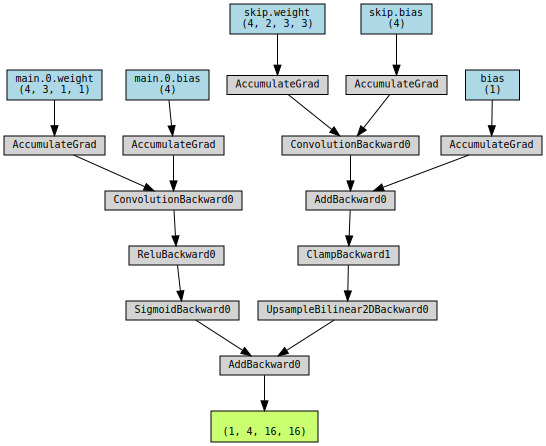

In [17]:
svg_path = "test_model_graph.svg"
display(SVG(filename=svg_path))